In [1]:
import glob
import os 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import glob, os
import seaborn as sns

In [2]:
testDF = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/BPASS/NEWSINMODS/z001/sneplot-z001-2.65", delim_whitespace=True, header=None)

In [3]:
from numpy import diff

In [4]:
np.median(testDF[32].values[-100:])

1.14067

In [5]:
testDF[7]

0      0.00005
1      0.00005
2      0.00005
3      0.00005
4      0.00005
        ...   
989    0.78636
990    0.78636
991    0.78636
992    0.78636
993    0.78636
Name: 7, Length: 994, dtype: float64

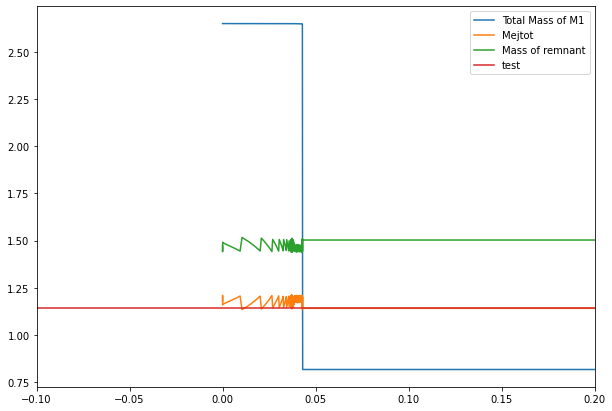

In [6]:
plt.figure(figsize=(10,7))
plt.xlim((-0.1, 0.2))
plt.plot(testDF[1]/1.e10, testDF[5], label='Total Mass of M1')
#plt.plot(testDF[1]/1.e10, testDF[28],label='Mej')
plt.plot(testDF[1]/1.e10, testDF[30],label='Mejtot')
#plt.plot(testDF[1]/1.e10, testDF[32],label='Mej')
plt.plot(testDF[1]/1.e10, testDF[27],label='Mass of remnant')
plt.axhline(y=np.median(testDF[32].values[-100:]),c='tab:red', label='test')
plt.legend()

In [7]:
dirs = ['z001','z002','z003','z004','z006','z008','z010','z014','z020','z030','z040','zem4','zem5']

Z_arr = []
mass_ejected = []
mass_primary = []
Age = []
bin_sep = []
secondary_rad = []

bin_path = "/Users/alexgagliano/Documents/Research/2020oi/data/BPASS/NEWBINMODS/NEWBINMODS/"
sin_path = "/Users/alexgagliano/Documents/Research/2020oi/data/BPASS/NEWSINMODS/"

#for pre_path in [bin_path, sin_path]:
#pre_path = sin_path  
pre_path=bin_path
for d in dirs:
    path = pre_path + d 
    os.chdir(path)
    i = 0
    for file in glob.glob("sneplot*"):
        if i%500==0:
            print(i)
        i += 1
        testRun = pd.read_csv(path+"/"+file, delim_whitespace=True, header=None)
        #find out if we died in a core-collapse Ic SN
        # if Hydrogen mass is greater than 10^-3 Msol
        # if the CO core mass is smaller than 1.38 M⊙
        # if the total stellar mass is smaller than 1.5 M⊙.
        #then don't make a 
        if ((testRun[16].values[-1] > 1.e-3) | (testRun[7].values[-1] < 1.38) | (testRun[5].values[-1] < 1.5)):
            continue
        else:
            dydx = diff(testRun[5])/diff(testRun[1])
            #mass_ejected.append(np.median(testRun[30])) the old way of doing things
            mass_ejected.append(np.median(testRun[30].values[-100:])) #the new way of doing things
            mass_primary.append(testRun[5].values[0])
            Z_arr.append(d)
            timeSN = testRun[1].values[np.where(np.abs(dydx) == np.nanmax(np.abs(dydx)))[0][0]]
            Age.append(timeSN)
            bin_sep.append(testRun[35].values[-1])
            secondary_rad.append(testRun[46].values[-1])

0


/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
80

In [9]:
results_DF = pd.DataFrame({'Mej':np.array(mass_ejected), 'Mstar':np.array(mass_primary), 
                           'Z_str':np.array(Z_arr), 'Age(yr)':np.array(Age), 
                          'DLog10(R2/Rsun)':np.array(secondary_rad),'log(BinarySep/Rsun)':np.array(bin_sep)})

In [10]:
results_DF['Z'] = np.nan
results_DF.loc[results_DF['Z_str'] == 'z001', 'Z']  = 0.001
results_DF.loc[results_DF['Z_str'] == 'z002', 'Z']  = 0.002
results_DF.loc[results_DF['Z_str'] == 'z003', 'Z']  = 0.003
results_DF.loc[results_DF['Z_str'] == 'z004', 'Z']  = 0.004
results_DF.loc[results_DF['Z_str'] == 'z006', 'Z']  = 0.006
results_DF.loc[results_DF['Z_str'] == 'z008', 'Z']  = 0.008
results_DF.loc[results_DF['Z_str'] == 'z010', 'Z']  = 0.01

results_DF.loc[results_DF['Z_str'] == 'zem5', 'Z']  = 1.e-5
results_DF.loc[results_DF['Z_str'] == 'zem4', 'Z']  = 1.e-4
results_DF.loc[results_DF['Z_str'] == 'z040', 'Z']  = 0.04
results_DF.loc[results_DF['Z_str'] == 'z030', 'Z']  = 0.03
results_DF.loc[results_DF['Z_str'] == 'z020', 'Z']  = 0.02
results_DF.loc[results_DF['Z_str'] == 'z014', 'Z']  = 0.014

#results_DF.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/derived_data/BPASS_MejModels_Single_wAge_newMej_CoreCollapse.csv",index=False)
results_DF.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/derived_data/BPASS_MejModels_Binary_wAge_newMej_CoreCollapse_wCompanion.csv",index=False)

In [11]:
results_DF_SIN = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/derived_data/BPASS_MejModels_Single_wAge_newMej_CoreCollapse.csv")
results_DF_BIN = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/derived_data/BPASS_MejModels_Binary_wAge_newMej_CoreCollapse_wCompanion.csv")

In [12]:
np.unique(results_DF_BIN['Z'])

array([1.0e-05, 1.0e-04, 1.0e-03, 2.0e-03, 3.0e-03, 4.0e-03, 6.0e-03,
       8.0e-03, 1.0e-02, 1.4e-02, 2.0e-02, 3.0e-02, 4.0e-02])

In [13]:
#DF_cut1 = results_DF[results_DF['Mej'] < 2.]
#DF_cut2 = DF_cut1[DF_cut1['Mej'] > 1.]
DF_cut = results_DF_SIN
DF_cut2 = results_DF_BIN

In [14]:
results_DF_SIN['Model'] = 'Single'
results_DF_BIN['Model'] = 'Binary'

In [15]:
#DF_stripped_envelope_SIN = DF_cut[DF_cut['Mstar']>=7.]
#DF_stripped_envelope_BIN = DF_cut2[DF_cut2['Mstar']>=7.]

DF_stripped_envelope_SIN = DF_cut
DF_stripped_envelope_BIN = DF_cut2

fullDF = pd.concat([DF_stripped_envelope_SIN, DF_stripped_envelope_BIN],ignore_index=True)

In [158]:
np.nanmin(fullDF.loc[(fullDF['Mej'] > 0.78) & (fullDF['Mej'] <0.84), 'Mstar'])


6.5

In [160]:
np.nanmax(fullDF.loc[(fullDF['Mej'] > 0.78) & (fullDF['Mej'] < 0.84), 'Mstar'])


13.0

In [98]:
6.5, 14

(6.5, 14)

In [99]:
1.44-0.11

1.3299999999999998

In [68]:
1.44+0.11

1.55

In [161]:
fullDF_sub2 = fullDF[fullDF['Mej'] <= (0.84)]
fullDF_MejCut = fullDF_sub2[fullDF_sub2['Mej'] >= (0.78)]
#0.6504, 0.7704

In [140]:
100*6.957e12

695700000000000.0

(array([58., 66., 39., 28.,  6.,  8.,  4.,  2.,  1.,  3.]),
 array([ 0.62425208,  1.59906865,  2.57388522,  3.54870179,  4.52351835,
         5.49833492,  6.47315149,  7.44796805,  8.42278462,  9.39760119,
        10.37241776]),
 <a list of 10 Patch objects>)

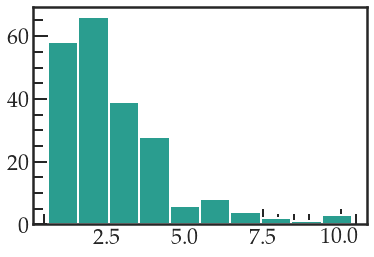

In [141]:
#plt.hist(fullDF_MejCut['Mstar'])
plt.hist(10**fullDF_MejCut['DLog10(R2/Rsun)']) #cm

In [142]:
np.sum((10**fullDF_MejCut['DLog10(R2/Rsun)']*6.957e10)<2.e11)/len(fullDF_MejCut)

0.6558139534883721

In [143]:
np.sum((10**fullDF_MejCut['log(BinarySep/Rsun)']>10) & (10**fullDF_MejCut['log(BinarySep/Rsun)']<150))/len(fullDF_MejCut)

0.8511627906976744

(array([109.,  52.,  23.,   8.,   7.,   5.,   6.,   2.,   1.,   2.]),
 array([  4.79135886,  29.5098707 ,  54.22838254,  78.94689438,
        103.66540622, 128.38391806, 153.1024299 , 177.82094174,
        202.53945357, 227.25796541, 251.97647725]),
 <a list of 10 Patch objects>)

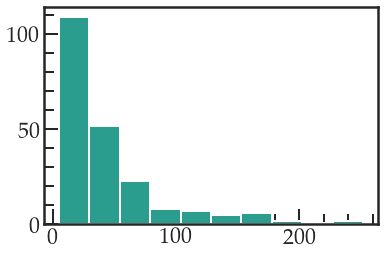

In [144]:
plt.hist(10**fullDF_MejCut['log(BinarySep/Rsun)'])

In [162]:
np.mean(np.log10(fullDF_MejCut['Age(yr)']))

7.465295809940257

In [163]:
np.mean(fullDF_MejCut['Mstar'])

9.495348837209303

In [164]:
np.median(fullDF_MejCut['Mstar'])

9.5

In [167]:
np.std(fullDF_MejCut['Mstar'])

1.032034227026634

In [166]:
np.std(np.log10(fullDF_MejCut['Age(yr)']))

0.08865762864454582

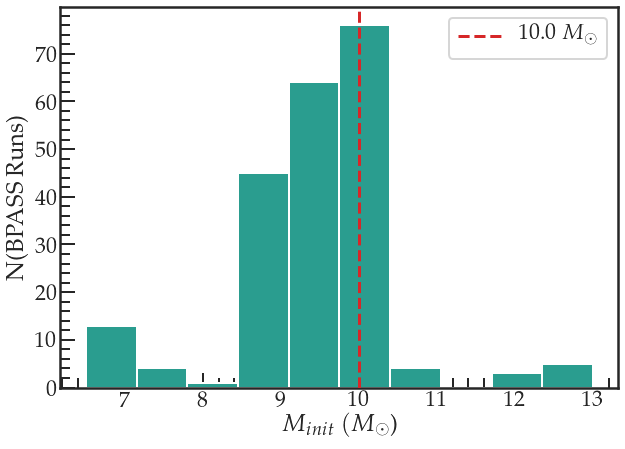

In [168]:
plt.figure(figsize=(10,7))
plt.hist(fullDF_MejCut['Mstar'], bins=10)
plt.xlabel(r"$M_{init} \ (M_{\odot}$)")
plt.axvline(x=10.0, zorder=100, c='tab:red', ls='--', label=r'10.0 $M_{\odot}$')
plt.ylabel("N(BPASS Runs)")
plt.legend()

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Log10(Age)')

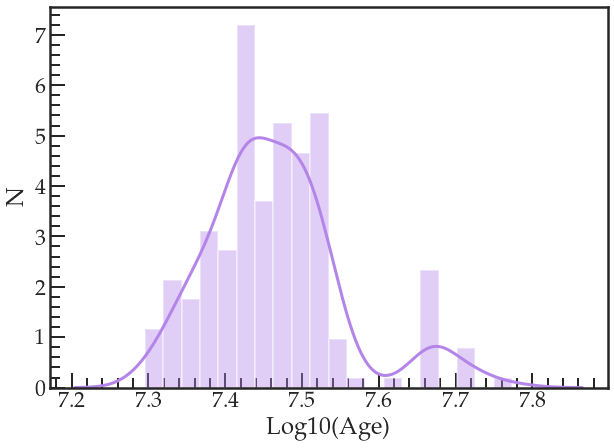

In [169]:
plt.figure(figsize=(10,7))
g = sns.distplot(np.log10(fullDF_MejCut['Age(yr)']), color='#B485E9', bins=20)
data = g.get_lines()[0].get_data()
plt.ylabel("N")
plt.xlabel("Log10(Age)")
#plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/Histogram_Age_BPASSResults.png",bbox_inches='tight', dpi=300)

In [170]:
df = pd.DataFrame({'Ages':data[0], 'BPASS_ProbDensity':data[1]})
df.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/derived_data/2020oi_BPASS_ages_newMej_CoreCollapse.csv",index=False)

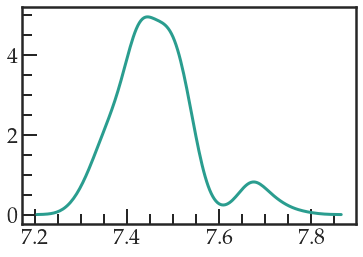

In [171]:
plt.plot(data[0], data[1])

In [172]:
pd.__version__

'1.2.3'

In [173]:
import scipy.stats as stats
mu, sigma = stats.norm.fit(np.log10(fullDF_MejCut['Age(yr)']))
points = np.linspace(stats.norm.ppf(0.01,loc=mu,scale=sigma),
                 stats.norm.ppf(0.9999,loc=mu,scale=sigma),100)
pdf = stats.norm.pdf(points,loc=mu,scale=sigma)

In [174]:
np.dtype(fullDF['Mej'])

dtype('float64')

In [175]:
#estimating a kde from the distribution:
fullDF['Mstar'] = fullDF['Mstar'].astype("float")
fullDF['Mej'] = fullDF['Mej'].astype("float")

<Figure size 1440x1584 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

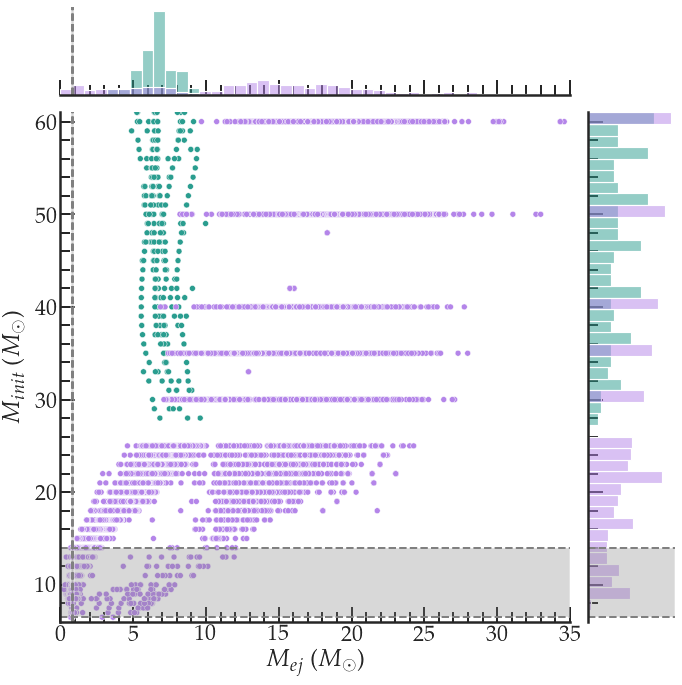

In [176]:
sns.set_context("poster")

#plotting - TARDIS sim
#sns.set_context("poster")
#    sns.set(font_scale=)
sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15

plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = False

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.figure(figsize=(20,22))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

colors = ["#2A9D8F", "#B485E9"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(20,20))
grid = sns.JointGrid(x='Mej', y='Mstar',ylim=(6, 61), xlim=(0, 35), data=fullDF, height=10)

g = grid.plot_joint(sns.scatterplot, hue='Model', data=fullDF, s=35, legend=False)
sns.histplot(x=fullDF.loc[fullDF['Model']=='Single', 'Mej'], ax=g.ax_marg_x, legend=False, alpha=0.5, stat='density', color='#2A9D8F',bins=np.linspace(0, 35, 45))
sns.histplot(x=fullDF.loc[fullDF['Model']=='Binary', 'Mej'], ax=g.ax_marg_x, legend=False, alpha=0.5, stat='density', color='#B485E9',bins=np.linspace(0, 35, 45))
sns.histplot(y=fullDF.loc[fullDF['Model']=='Single', 'Mstar'], ax=g.ax_marg_y, legend=False, alpha=0.5, stat='density', color='#2A9D8F',bins=np.linspace(6, 61, 45))
sns.histplot(y=fullDF.loc[fullDF['Model']=='Binary', 'Mstar'], ax=g.ax_marg_y, legend=False, alpha=0.5, stat='density', color='#B485E9',bins=np.linspace(6, 61, 45))

g.ax_joint.set_xlabel(r"$M_{ej}$ ($M_{\odot}$)")
g.ax_joint.set_ylabel(r"$M_{init}$  ($M_{\odot}$)")

g.ax_joint.axhspan(6.5, 14.0, facecolor='grey', alpha=0.3)
g.ax_joint.axvspan(0.7, 0.9, facecolor='grey', alpha=0.3)
#1.33, 1.55
g.ax_joint.axhline(y=6.5, lw=2, c='grey', ls='--')
g.ax_joint.axhline(y=14., lw=2, c='grey', ls='--')

g.ax_joint.axvline(x=0.78, lw=2, c='grey', ls='--')
g.ax_joint.axvline(x=0.84, lw=2, c='grey', ls='--')

g.ax_marg_x.axvline(x=0.78, lw=2, c='grey', ls='--')
g.ax_marg_x.axvline(x=0.84, lw=2, c='grey', ls='--')

g.ax_marg_x.direction='in'
g.ax_marg_y.direction='in'

g.ax_marg_y.axhline(y=6.5, lw=2, c='grey', ls='--')
g.ax_marg_y.axhline(y=14.0, lw=2, c='grey', ls='--')

g.ax_marg_y.axhspan(6.5, 14.0, facecolor='grey', alpha=0.3)
g.ax_marg_x.axvspan(0.7, 0.9, facecolor='grey', alpha=0.3)

#plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/BPASS_Models_Final.png",bbox_inches='tight', dpi=300)

<Figure size 1440x1584 with 0 Axes>

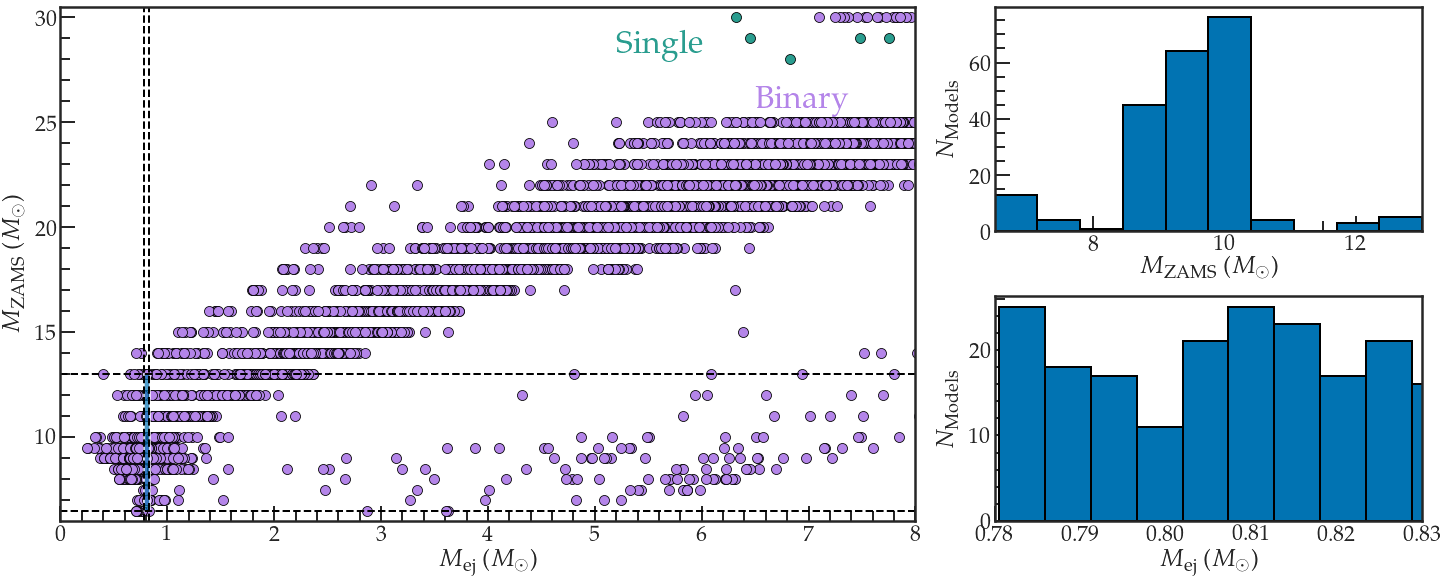

In [183]:
sns.set_context("poster")

#plotting - TARDIS sim
#sns.set_context("poster")
#    sns.set(font_scale=)
sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15

plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = False

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.figure(figsize=(20,22))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

colors = ["#2A9D8F", "#B485E9"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fullDF_single = fullDF[fullDF['Model']=='Single']
fullDF_binary = fullDF[fullDF['Model']=='Binary']

fig3 = plt.figure(figsize=(20,8), constrained_layout=True)
gs = fig3.add_gridspec(2, 2, width_ratios=[2, 1])
f3_ax1 = fig3.add_subplot(gs[0, 1])
f3_ax2 = fig3.add_subplot(gs[:, :-1])
f3_ax3 = fig3.add_subplot(gs[1:, -1])

f3_ax2.scatter(fullDF_single['Mej'], fullDF_single['Mstar'], c='#2A9D8F', ec='k', lw=0.8, s=100)
f3_ax2.scatter(fullDF_binary['Mej'], fullDF_binary['Mstar'], c='#B485E9', ec='k', lw=0.8, s=100)

f3_ax2.axhline(y=6.5, lw=2, c='k', ls='--')
f3_ax2.axhline(y=13., lw=2, c='k', ls='--')

f3_ax2.axvline(x=0.78, lw=2, c='k', ls='--')
f3_ax2.axvline(x=0.83, lw=2, c='k', ls='--')

f3_ax2.fill_between(np.linspace(np.nanmin(fullDF_MejCut['Mej']), np.nanmax(fullDF_MejCut['Mej']), num=len(fullDF_MejCut)), np.nanmin(fullDF_MejCut['Mstar']),np.nanmax(fullDF_MejCut['Mstar']), facecolor=sns.color_palette("colorblind", 10)[0], alpha=0.7)
#f3_ax2.axvspan(1.33, 1.55, facecolor='grey', alpha=0.3)

f3_ax2.set_xlabel(r"$M_{\rm{ej}}$ ($M_{\odot}$)")
f3_ax2.set_ylabel(r"$M_{\rm{ZAMS}}$  ($M_{\odot}$)")

f3_ax1.hist(fullDF_MejCut['Mstar'], color=sns.color_palette("colorblind", 10)[0], bins=10, edgecolor='k')
f3_ax1.set_xlim((6.5, 13))
f3_ax1.set_xlabel(r"$M_{\rm{ZAMS}}$  ($M_{\odot}$)")

f3_ax3.hist(fullDF_MejCut['Mej'], color=sns.color_palette("colorblind", 10)[0], bins=11, edgecolor='k')
f3_ax3.set_xlim((0.78, 0.83))
f3_ax3.set_xlabel(r"$M_{\rm{ej}}$ ($M_{\odot}$)")

f3_ax2.set_ylim((6, 30.5))
f3_ax2.set_xlim((0, 8))

f3_ax2.text(6.5, 25.7, "Binary", c='#B485E9', fontsize=32)
f3_ax2.text(5.2, 28.3, "Single", c='#2A9D8F',fontsize=32)

f3_ax1.set_ylabel(r"$N_{\rm{Models}}$")
f3_ax3.set_ylabel(r"$N_{\rm{Models}}$")

plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/BPASS_Models_Final.png",bbox_inches='tight', dpi=300)